<a href="https://colab.research.google.com/github/Muyiiwaa/learn-EDA/blob/master/statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# data wrangling
import pandas as pd
import numpy as np


# visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


# statistical analysis and modelling
from scipy import stats
import sklearn

In [2]:
data = px.data.gapminder()


In [3]:
war_countries = ['Ukraine','Yemen','Afghanistan','Democratic Republic of Congo','Ethiopia','Sudan',
                 'Syria','Somalia','Central African Republic','Mexico','Myanmar','Gaza','Haiti','Nigeria','Armenia and Azerbaijan',
                 'Chad','Mali']
data['war'] = ['Yes' if x in war_countries else 'No' for x in data['country']]


In [4]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,war
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,Yes
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,Yes
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,Yes
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,Yes
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,Yes


In [5]:
px.histogram(data_frame = data, x = 'continent', y = 'lifeExp', histfunc = 'avg')

Question: Is life expectancy different accross countries significantly

### Steps to follow in statistical analysis

1. set our hypothesis and choose the level of significance.
2. choose a statistical test that solves the problem
3. set our decision rule
4. make conclusion based on 1,2 and 3.

In [29]:
# set our hypothesis

null = 'There is no significant difference between the average life expectancy across continents'
alternative = 'There is a significant difference between the average life expectancy across continents'

# choose a level of significance
alpha = 0.05


# choose a statistical test.
asia = data[data['continent'] == 'Asia']['lifeExp']
africa = data[data['continent'] == 'Africa']['lifeExp']
europe = data[data['continent'] == 'Europe']['lifeExp']
americas = data[data['continent'] == 'Americas']['lifeExp']
oceania = data[data['continent'] == 'Oceania']['lifeExp']

stats_values, pvalue = stats.f_oneway(asia,africa,europe,americas,oceania)

# decision rule
if pvalue  < alpha:
  print(f'reject null hypothesis')
  print(f'Conclusion: {alternative}')
else:
  print(f'reject alternative hypothesis')
  print(f'Conclusion: {null}')

reject null hypothesis
Conclusion: There is a significant difference between the average life expectancy across continents


In [6]:
px.scatter(data_frame= data, x = 'lifeExp', y = 'gdpPercap')

Question: Is there a significant relationhsip between gdp and lifeExp


Text(0.5, 1.0, 'Pearson')

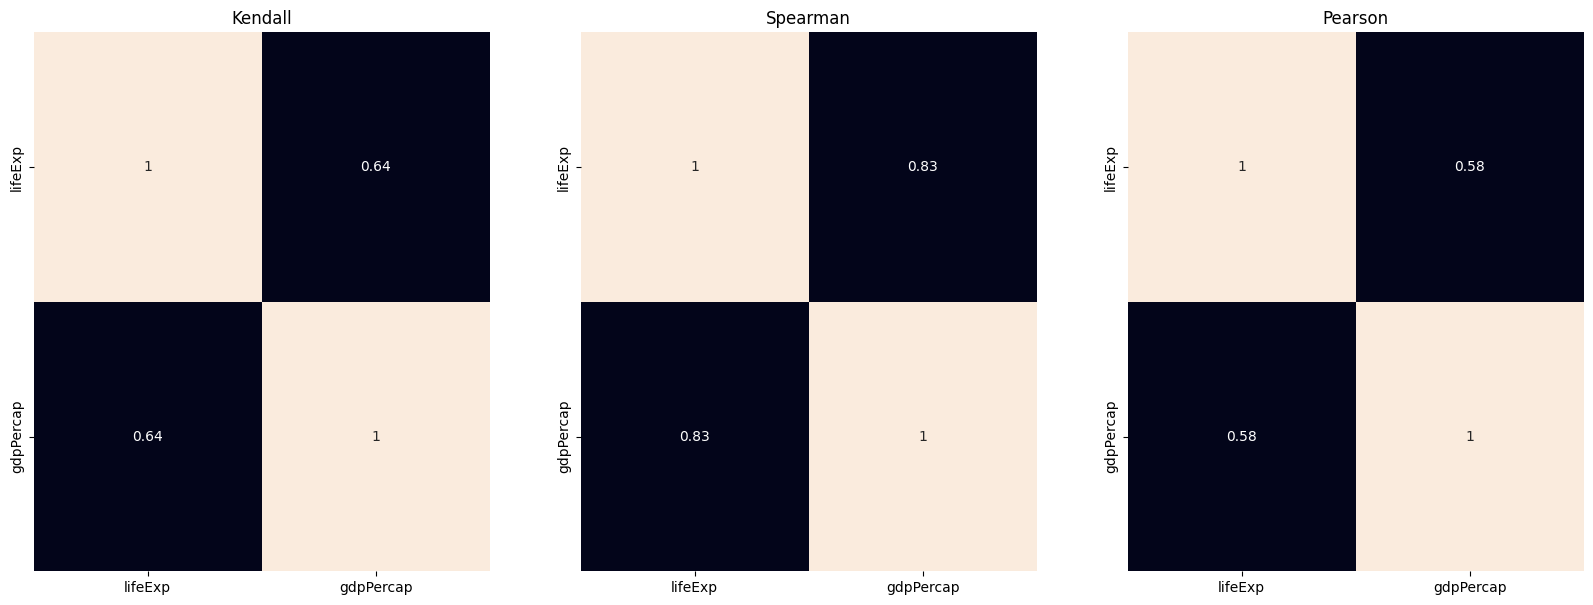

In [19]:
# correlation test

corr_kendall = data[['lifeExp','gdpPercap']].corr(method ='kendall')
corr_spearman = data[['lifeExp','gdpPercap']].corr(method ='spearman')
corr_pearson = data[['lifeExp','gdpPercap']].corr(method ='pearson')

fig, axes = plt.subplots(1,3, figsize = (20,7))
sns.heatmap(data = corr_kendall, annot = True, ax = axes[0], cbar = False)
sns.heatmap(data = corr_spearman, annot = True, ax = axes[1], cbar = False)
sns.heatmap(data = corr_pearson, annot = True, ax = axes[2], cbar = False)

axes[0].set_title('Kendall')
axes[1].set_title('Spearman')
axes[2].set_title('Pearson')
# checking correlation assumptions

<Axes: xlabel='gdpPercap'>

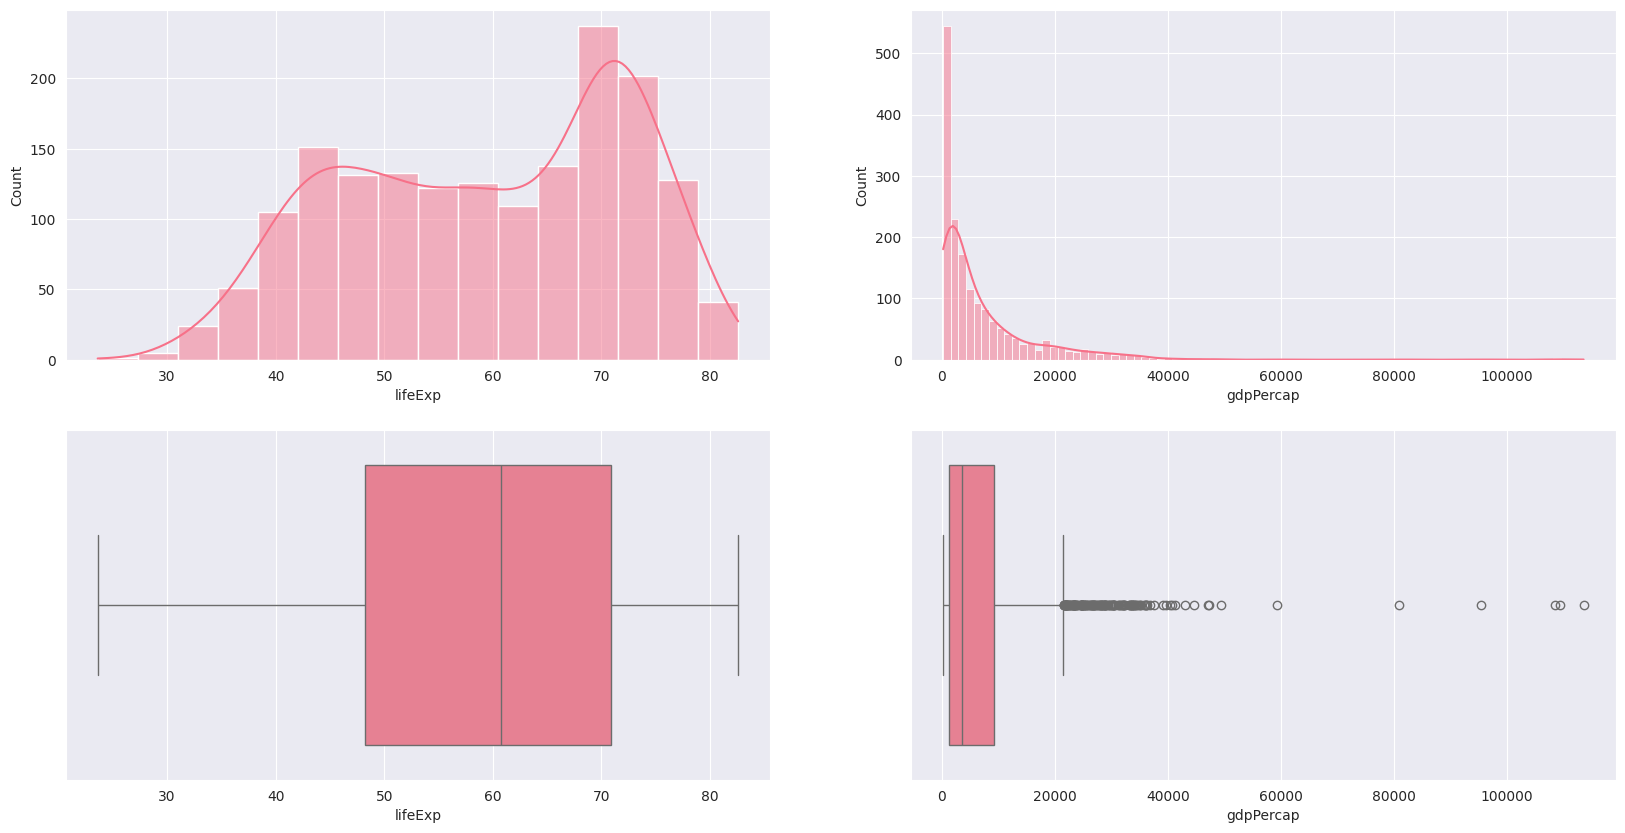

In [23]:
# checking assumptions for normality and outliers

sns.set_style('darkgrid')
sns.set_palette('husl')

fig, axes = plt.subplots(2,2, figsize = (20,10))
sns.histplot(data = data, x = 'lifeExp', kde = True, ax=axes[0,0])
sns.histplot(data = data, x = 'gdpPercap', kde = True, ax=axes[0,1])
sns.boxplot(data = data, x = 'lifeExp', ax=axes[1,0])
sns.boxplot(data = data, x = 'gdpPercap',ax=axes[1,1])

In [30]:
# testing the significance of spearmanr correlation

# set our hypothesis

null = 'There is no significant correlation between the average life expectancy and gdp'
alternative = 'There is a significant association between the average life expectancy and gdp'

# choose a level of significance
alpha = 0.05


# choose a statistical test.
life = data['lifeExp'].values
gdp = data['gdpPercap'].values
corelation_coeff, pvalue = stats.spearmanr(life,gdp)

# decision rule
if pvalue  < alpha:
  print(f'reject null hypothesis')
  print(f'Conclusion: {alternative}')
else:
  print(f'reject alternative hypothesis')
  print(f'Conclusion: {null}')
print(f'pvalue: {pvalue}, correlation coefficient: {corelation_coeff}')

reject null hypothesis
Conclusion: There is a significant association between the average life expectancy and gdp
pvalue: 0.0, correlation coefficient: 0.8264711811970715


In [7]:
px.histogram(data_frame = data, x = 'continent', y = 'lifeExp', histfunc = 'avg', color = 'war',
             barmode = 'group')

QUestion: Does War and continent of location affect life expectancy

In [50]:
# two way anova

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Performing two-way ANOVA
model = ols('lifeExp ~ C(continent) + C(war) + C(continent):C(war)', data=data).fit()
anova_output =sm.stats.anova_lm(model, typ=3)
anova_output


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2



,sum_sq,df,F,PR(>F)
Intercept,1.325508e+06,1.0,16259.406639,0.000000e+00
C(continent),1.225512e+05,4.0,375.819939,7.418396e-232
C(war),1.849683e+03,1.0,22.689212,2.066562e-06
C(continent):C(war),1.262514e+03,4.0,3.871671,2.100785e-02
Residual,1.382623e+05,1696.0,NaN,NaN


In [53]:
pvalue_continent = anova_output['PR(>F)'].loc['C(continent)']
pvalue_war =  anova_output['PR(>F)'].loc['C(war)']
pvalue_interaction =  anova_output['PR(>F)'].loc['C(continent):C(war)']



# set our hypothesis

null = 'There is no significant difference between lifexp and continent and war'
alternative = 'There is a significant difference between lifexp and continent and war'

# choose a level of significance
alpha = 0.05


# decision rule
if pvalue_interaction  < alpha:
  print(f'reject null hypothesis')
  print(f'Conclusion: {alternative}')
else:
  print(f'reject alternative hypothesis')
  print(f'Conclusion: {null}')
print(f'pvalue: {pvalue_interaction}')

reject null hypothesis
Conclusion: There is a significant difference between lifexp and continent and war
pvalue: 0.021007850925169234


In [49]:
px.histogram(data_frame= data, x = 'continent', color = 'war', barmode = 'group')

Question: is there a significant association between the continent and whether or not there are going to be war ravaged

In [35]:
# set our hypothesis

null = 'There is no significant association between War and continent'
alternative = 'There is a significant association between war and continent'

# choose a level of significance
alpha = 0.05


# choose a statistical test.
cross_war_cont = pd.crosstab(data['continent'], data['war'])
statistics, pvalue, dof, expected = stats.chi2_contingency(cross_war_cont)

# decision rule
if pvalue  < alpha:
  print(f'reject null hypothesis')
  print(f'Conclusion: {alternative}')
else:
  print(f'reject alternative hypothesis')
  print(f'Conclusion: {null}')
print(f'pvalue: {pvalue}')

reject null hypothesis
Conclusion: There is a significant association between war and continent
pvalue: 2.0185864257833118e-11
